# Credit Card Approval Prediction Model

In [130]:
# Data analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

In [43]:
#Loading Dataset
#dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None, sep = ',')
#using this because internet is not working
dataset = pd.read_csv('Downloads/crx.csv')

In [44]:
# Setting Column Names
dataset.columns=['Genre','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre           689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [46]:
dataset.isna().sum()

Genre             0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [47]:
dataset.describe()

,Debt,YearsEmployed,CreditScore,Income
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [48]:
dataset.describe(include = ['O'])

,Genre,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,689,689,689,689,689,689,689,689,689,689,689,689
unique,3,349,4,4,15,10,2,2,2,3,170,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,467,12,518,518,137,398,360,395,373,624,132,383


This data contains'?' in place of no/Nan values

In [49]:
dataset.replace('?', np.NaN, inplace = True)

In [50]:
dataset.isna().sum()

Genre             12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [51]:
dataset.fillna(dataset.mean(), inplace=True)

C:\Users\sidratul.muntaha\AppData\Local\Temp\ipykernel_10844\2429533873.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


Since the dataset contains non-numerical values so mean is not applicable, therefore mode() will be used to fill empty cells

In [52]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        dataset[col].fillna(dataset[col].mode()[0],inplace=True)

In [53]:
dataset.isna().sum()

Genre             0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre           689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


Data in Column "Age" is numerical to it shouldn't be of Object Data_type.
Changing it's datatype to integer

In [55]:
dataset['Age'] = pd.to_numeric(dataset['Age'])

In [56]:
dataset['Age'] = dataset['Age'].round(0).astype(int)

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre           689 non-null    object 
 1   Age             689 non-null    int32  
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 83.6+ KB


In [58]:
dataset.nunique()

Genre               2
Age                60
Debt              215
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           169
Income            240
Approved            2
dtype: int64

# Mapping Data to specific numbers. 

This could also be done via Scaler fn.

In [59]:
dataset['Genre'].value_counts()

b    479
a    210
Name: Genre, dtype: int64

Let's assume:
a = female = 1
b = male = 0

In [60]:
dataset['Genre'] = dataset['Genre'].map({'a':1, 'b':0})

In [61]:
dataset['Married'].value_counts()

u    524
y    163
l      2
Name: Married, dtype: int64

For the sake of simplicity, let's assume:
u = yes = 1, 
y = No, 0,
and replace l with mode i.e, 1.


In [62]:
dataset['Married'] = dataset['Married'].map({'u':1, 'y':0, 'l':1})

In [63]:
dataset['PriorDefault'].value_counts()

t    360
f    329
Name: PriorDefault, dtype: int64

In [64]:
dataset['PriorDefault'] = dataset['PriorDefault'].map({'t':1, 'f':0})

In [65]:
dataset['BankCustomer'].value_counts()

g     524
p     163
gg      2
Name: BankCustomer, dtype: int64

In [66]:
dataset['BankCustomer'] = dataset['BankCustomer'].map({'g':1, 'p':0, 'gg':1})

In [67]:
dataset['Employed'].value_counts()

f    395
t    294
Name: Employed, dtype: int64

In [68]:
dataset['Employed'] = dataset['Employed'].map({'f':1, 't':0})

In [69]:
dataset['Approved'] = dataset['Approved'].map({'+':1, '-':0})

<AxesSubplot:>

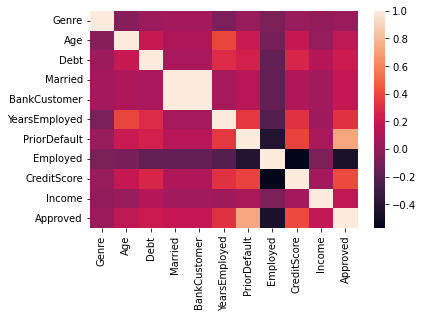

In [70]:
sns.heatmap(dataset.corr())

As per correlation Matrix, the more important features are: PriorDefault, YearsEmployed, & CreditScore. But i'll also consider Age, Debt & Income.

In [166]:
X_data = dataset[['Age', 'Debt', 'Income', 'PriorDefault', 'YearsEmployed', 'CreditScore']]
Y_data = dataset['Approved'] #dataset[['Approved']]-- doing it like this was creating errors because 1D array is required to use in the models

# Splitting Datasets into train_test_split


In [267]:
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 10)

In [268]:
Y_train_data

402    0
293    0
69     0
592    1
403    0
      ..
369    0
320    1
527    0
125    1
265    0
Name: Approved, Length: 551, dtype: int64

# Fitting Logistic Regression Model

In [297]:
lr = LogisticRegression(max_iter = 200, tol = 0.001) #randomly using maximum iterations = 200
lr.fit(X_train_data, Y_train_data)

LogisticRegression(max_iter=200, tol=0.001)

In [298]:
Y_pred = lr.predict(X_test_data)

In [299]:
cr = confusion_matrix(Y_test_data, Y_pred)
cr

array([[62, 10],
       [ 3, 63]], dtype=int64)

<AxesSubplot:>

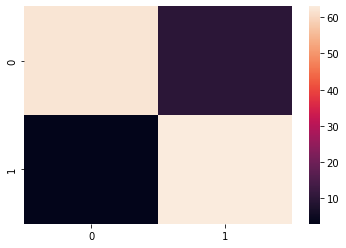

In [300]:
sns.heatmap(cr)

# Checking Model's Accuracy

In [301]:
r2_score(Y_test_data, Y_pred)

0.6224747474747474

In [302]:
f1_score(Y_test_data, Y_pred)

0.906474820143885

In [303]:
mean_absolute_error(Y_test_data, Y_pred)

0.09420289855072464

In [304]:
mean_squared_error(Y_test_data, Y_pred)

0.09420289855072464

In [305]:
accuracy_score(Y_test_data,Y_pred, normalize = True)

0.9057971014492754

# Finding the best performing model

In [306]:
scaler = MinMaxScaler(feature_range=(-1, 1))
rescaled_X_train_data = scaler.fit_transform(X_train_data)


In [307]:
#Finding the most suitable value of hyperparameters using GridCvSearch

#Considering only 2 hyperparameters of Logistic Regression, i.e.
tol = [0.001 ,0.0001]  #Tolerance for stopping criteria.
max_iter = [100, 150, 200]   #Maximum number of iterations taken for the solvers to converge.

param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fitting grid_model to the data
grid_model_result = grid_model.fit(rescaled_X_train_data , Y_train_data)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaled_X_train_data,Y_train_data))


Best: 0.843980 using {'max_iter': 100, 'tol': 0.001}
Accuracy of logistic regression classifier:  0.8457350272232305
